incêndios florestais no Brasil
Os incêndios florestais são um grave problema para a preservação das Florestas Tropicais. Compreender a frequência de incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los. O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.

In [60]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [61]:
dados = pd.read_csv('Dados_Incêndio.csv', encoding='latin-1')
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [62]:
# Campos nulos
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

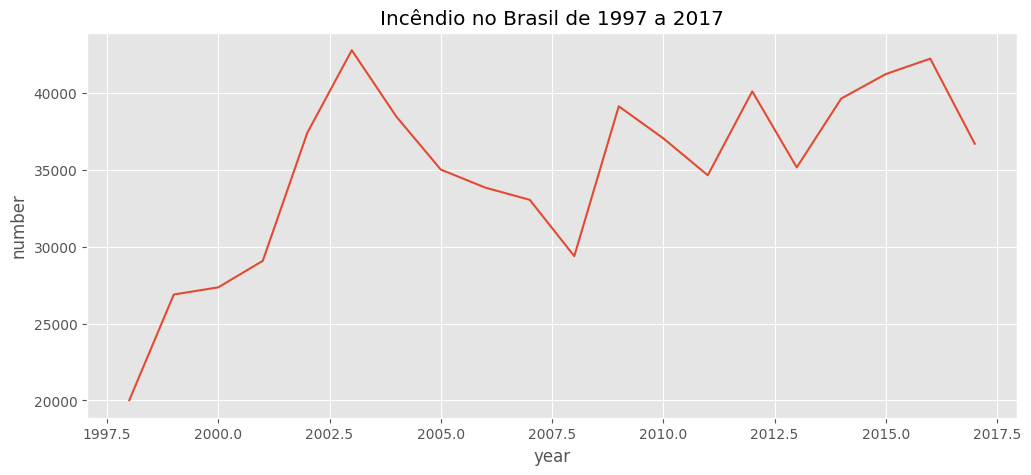

In [63]:
# Análise por ano do incêndio
analise = dados.groupby(by=['year']).sum().reset_index()
analise.head()

# Estilo do grafico
plt.style.use('ggplot')

# Tamanho:
plt.figure(figsize=(12, 5))

# Grafico:
plt.title('Incêndio no Brasil de 1997 a 2017')
sns.lineplot(data=analise, x='year', y='number', estimator='sum');

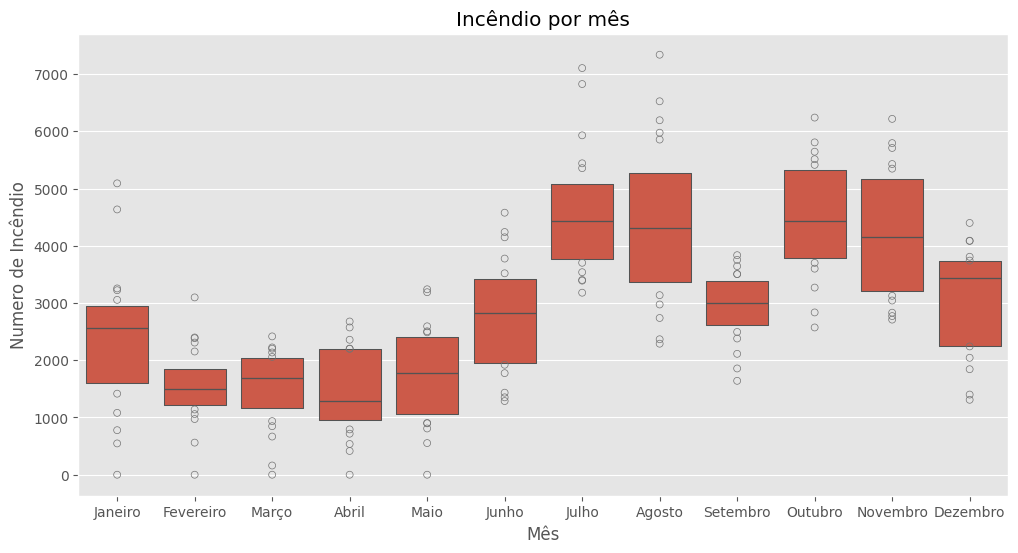

In [64]:
analise_02 = dados.groupby(by=['year', 'month']).sum().reset_index()
analise_02.head()

plt.figure(figsize=(12, 6))

# Estilo
plt.style.use('ggplot')
plt.title('Incêndio por mês')
sns.boxenplot(data=analise_02, x='month', y='number', order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

plt.xlabel('Mês')
plt.ylabel('Numero de Incêndio');

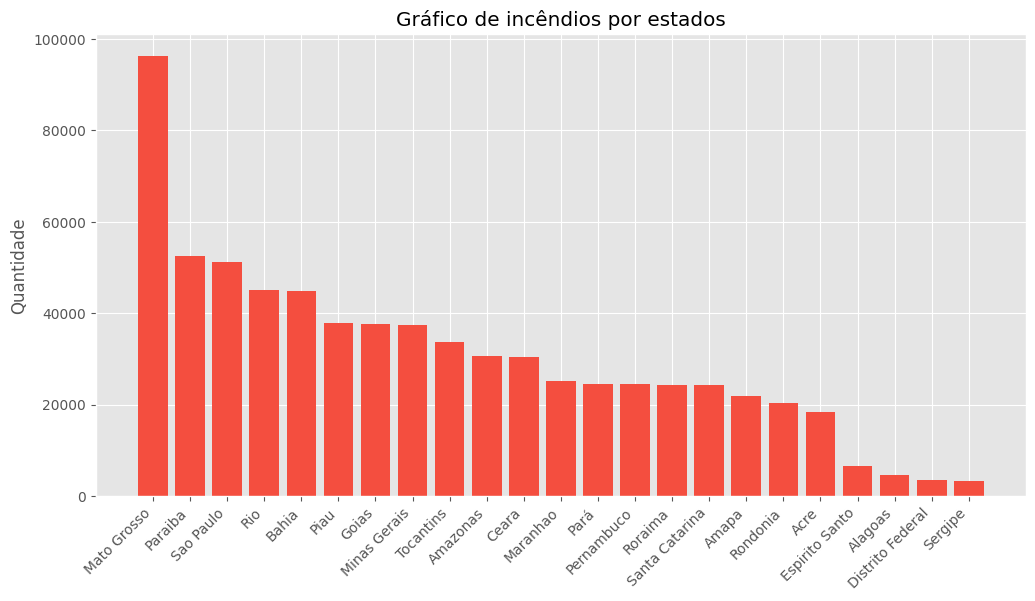

In [65]:
analise_03 = dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
analise_03.head()

plt.figure(figsize=(12, 6))

plt.title('Gráfico de incêndios por estados')
plt.bar(analise_03.state, analise_03['number'], color='#f44e3f');
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right');

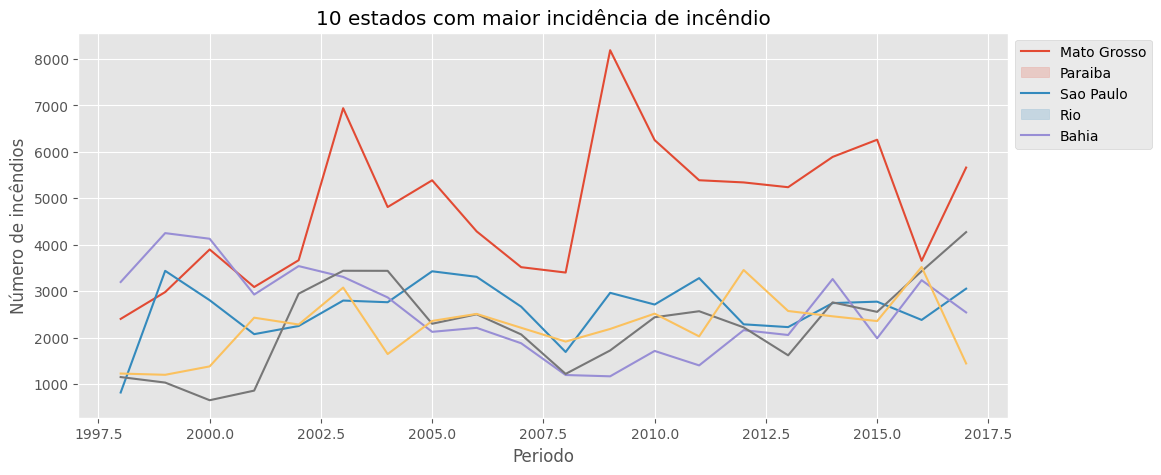

In [66]:
# Os 10 estados com maior foco de incêndio
lista_5estados = analise_03['state'][0:5].values

plt.figure(figsize=(12, 5))

# Montando o gráfico
for coluna in lista_5estados:
    filtro = dados.loc[dados['state'] == coluna]
    analise_local = filtro.groupby(by=['year']).sum().reset_index()
    plt.title(coluna)
    sns.lineplot(data=analise_local, x='year', y='number')
    plt.title('10 estados com maior incidência de incêndio')
    plt.xlabel('Periodo')
    plt.ylabel('Número de incêndios')
    plt.legend(lista_5estados, bbox_to_anchor=(1, 1.0));

In [67]:
# guardando os estados na variavel Estado
estados = analise_03.sort_values('state')['state'].values
valores = analise_03.sort_values('state')['number'].values # guardando os valores na variavel Valores
# Latitudes
lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# organizando os dados em um dicionário
dicionario = {
    'Estado' : estados,
    'Latitude' : lat,
    'Longetude': log,
    'Incendio' : valores
}
# Transformando o dicionario em um dataframe
analise_geografica = pd.DataFrame(dicionario)
analise_geografica.head()

,Estado,Latitude,Longetude,Incendio
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [83]:
# Criando grafico de mapa de calor

grafico = px.density_mapbox(
    analise_geografica,
    lat='Latitude',
    lon='Longetude',
    z='Incendio',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='open-street-map'
)
# Ajuste o tamanho do gráfico
grafico.update_layout(
    width=900,
    height=700
)